In [1]:
%load_ext autoreload
%autoreload 2

In [57]:
import pandas as pd
from src.results.statistical_analysis import calculate_spearman_correlations, summarize_correlations, calculate_statistical_differences
from src.visualization.plots import plot_line_correlations, plot_score_differences
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_complexity = pd.read_parquet('data/results/complexity_data.parquet')
df_performance = pd.read_parquet('data/results/performance_data.parquet')

In [4]:
df_complexity

,dataset,k,metric,method,dataset_complexity,majority_class_complexity,minority_class_complexity,most_complex_class,least_complex_class
0,a9a,1,kdn,mean_folds,0.190819,0.130744,0.380213,0.380213,0.130744
1,a9a,1,kdn,global,0.188784,0.129490,0.375717,0.375717,0.129490
2,a9a,1,ddn,mean_folds,0.213374,0.146188,0.425189,0.425189,0.146188
3,a9a,1,ddn,global,0.212416,0.145419,0.423633,0.423633,0.145419
4,a9a,2,kdn,mean_folds,0.201003,0.138729,0.397335,0.397335,0.138729
...,...,...,...,...,...,...,...,...,...
2743,vehicle2,9,ddn,global,0.166891,0.123822,0.290963,0.290963,0.123822
2744,vehicle2,10,kdn,mean_folds,0.089862,0.071096,0.143910,0.143910,0.071096
2745,vehicle2,10,kdn,global,0.079078,0.064650,0.120642,0.120642,0.064650
2746,vehicle2,10,ddn,mean_folds,0.189103,0.137653,0.337305,0.337305,0.137653


In [5]:
# Llamada a la función con los DataFrames correspondientes
correlation_results = calculate_spearman_correlations(df_performance, df_complexity)

## Determining the Superior Complexity Estimation: Global vs. Mean Folds Through Correlation with Predictive Success

### Accuracy

In [6]:
correlation_results['accuracy_score']

,method,k,complexity_metric,performance_metric,corr_dataset_complexity,corr_majority_class_complexity,corr_minority_class_complexity,corr_most_complex_class,corr_least_complex_class
0,mean_folds,1,kdn,accuracy_score,0.884413,0.823281,0.660335,0.651091,0.847953
1,mean_folds,1,ddn,accuracy_score,0.893418,0.854711,0.638040,0.629715,0.880303
2,mean_folds,2,kdn,accuracy_score,0.883660,0.837457,0.634785,0.626765,0.861549
3,mean_folds,2,ddn,accuracy_score,0.875258,0.853796,0.628550,0.620507,0.875652
4,mean_folds,3,kdn,accuracy_score,0.876448,0.837195,0.601121,0.590587,0.860740
5,mean_folds,3,ddn,accuracy_score,0.863915,0.844791,0.614825,0.603438,0.865270
6,mean_folds,4,kdn,accuracy_score,0.874340,0.839140,0.576234,0.566923,0.861068
7,mean_folds,4,ddn,accuracy_score,0.851960,0.836945,0.594062,0.587330,0.854867
8,mean_folds,5,kdn,accuracy_score,0.873335,0.836049,0.555574,0.545127,0.856821
9,mean_folds,5,ddn,accuracy_score,0.842649,0.831219,0.561038,0.554241,0.849578


In [7]:
df = correlation_results['accuracy_score']
# Generar el resumen de las correlaciones
correlation_summary = summarize_correlations(df)  # Usando 'scaled_mcc_score' como ejemplo

# Mostrar los resultados
correlation_summary

,method,complexity_metric,mean_corr_dataset,std_corr_dataset,mean_corr_majority,std_corr_majority,mean_corr_minority,std_corr_minority,mean_corr_most_complex,std_corr_most_complex,mean_corr_least_complex,std_corr_least_complex
0,global,ddn,0.856220,0.022377,0.828891,0.023127,0.563442,0.069303,0.559256,0.065428,0.849009,0.023861
1,global,kdn,0.879668,0.010014,0.857414,0.008371,0.526762,0.086317,0.515248,0.090182,0.881952,0.005205
2,mean_folds,ddn,0.843266,0.026231,0.818942,0.026709,0.551252,0.081908,0.547907,0.077705,0.839535,0.027674
3,mean_folds,kdn,0.873781,0.007804,0.833263,0.005871,0.534560,0.083094,0.523294,0.086270,0.857000,0.005007


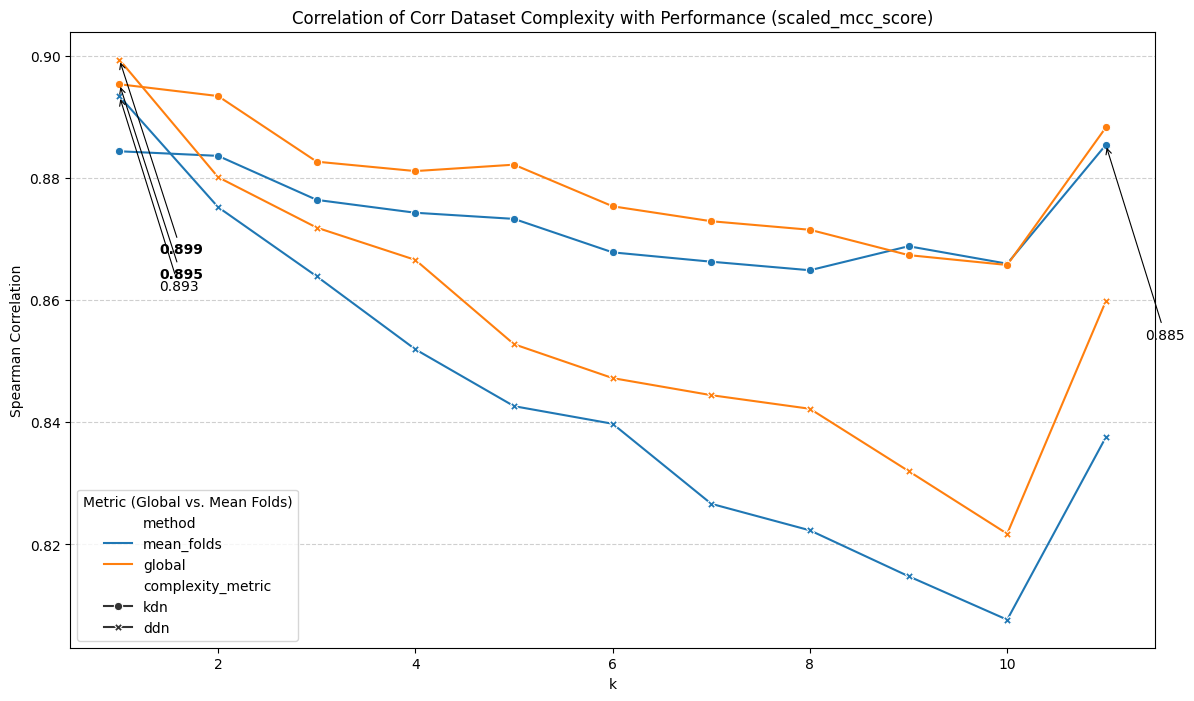

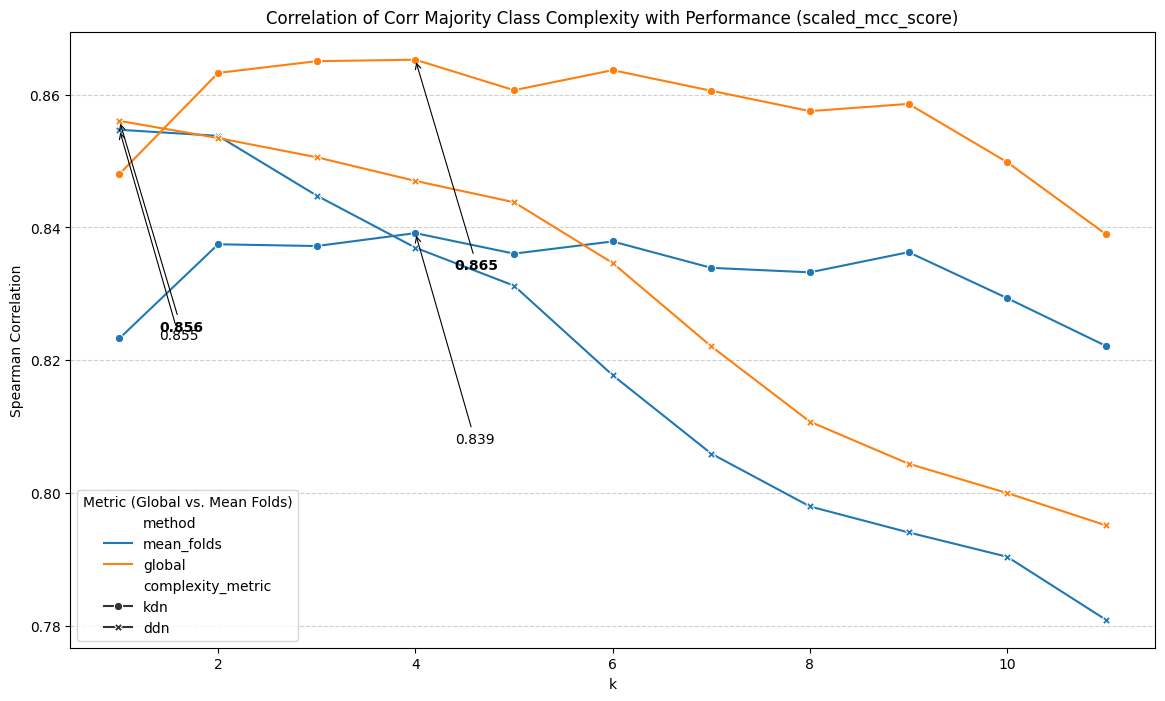

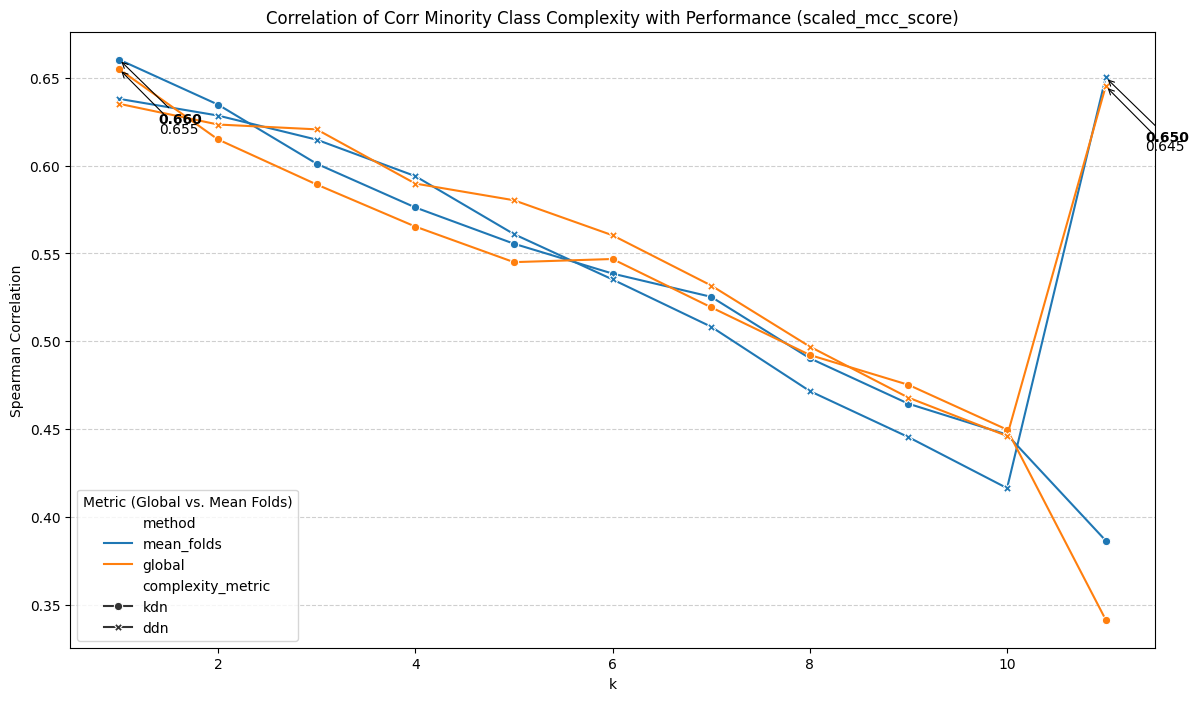

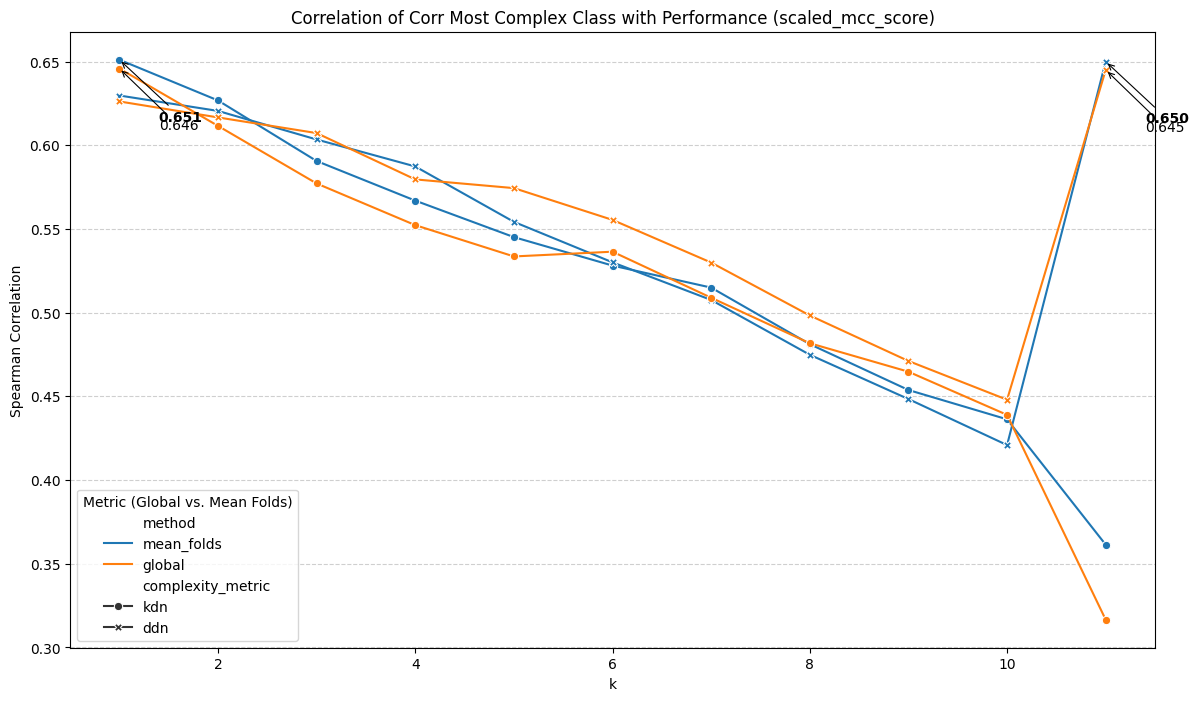

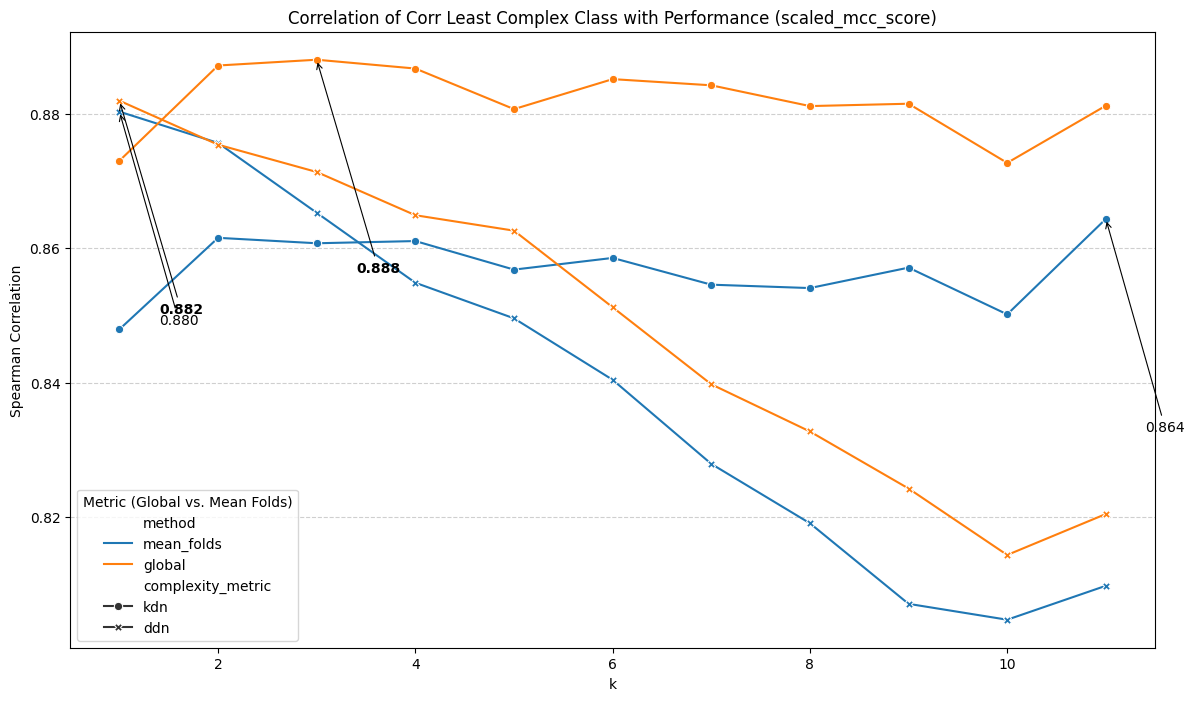

In [8]:
plot_line_correlations(df)

### F1 

In [9]:
correlation_results['f1_score']

,method,k,complexity_metric,performance_metric,corr_dataset_complexity,corr_majority_class_complexity,corr_minority_class_complexity,corr_most_complex_class,corr_least_complex_class
0,mean_folds,1,kdn,f1_score,0.345347,0.377737,0.748546,0.712280,0.405207
1,mean_folds,1,ddn,f1_score,0.288521,0.246864,0.807869,0.773039,0.275631
2,mean_folds,2,kdn,f1_score,0.336317,0.323793,0.790068,0.748298,0.349922
3,mean_folds,2,ddn,f1_score,0.232893,0.227472,0.800000,0.760791,0.250508
4,mean_folds,3,kdn,f1_score,0.305697,0.301522,0.804065,0.764725,0.327585
5,mean_folds,3,ddn,f1_score,0.194645,0.218971,0.770014,0.730281,0.241897
6,mean_folds,4,kdn,f1_score,0.291684,0.295140,0.811614,0.775596,0.320023
7,mean_folds,4,ddn,f1_score,0.169468,0.212895,0.739854,0.702131,0.233832
8,mean_folds,5,kdn,f1_score,0.277565,0.281412,0.817091,0.782690,0.303970
9,mean_folds,5,ddn,f1_score,0.147088,0.198033,0.701759,0.665414,0.220326


In [10]:
df = correlation_results['f1_score']
# Generar el resumen de las correlaciones
correlation_summary = summarize_correlations(df)  # Usando 'scaled_mcc_score' como ejemplo

# Mostrar los resultados
correlation_summary

,method,complexity_metric,mean_corr_dataset,std_corr_dataset,mean_corr_majority,std_corr_majority,mean_corr_minority,std_corr_minority,mean_corr_most_complex,std_corr_most_complex,mean_corr_least_complex,std_corr_least_complex
0,global,ddn,0.151642,0.091481,0.156487,0.118469,0.708042,0.083197,0.669225,0.084577,0.181299,0.119077
1,global,kdn,0.219449,0.063077,0.204594,0.078935,0.832301,0.025253,0.797312,0.027273,0.230448,0.074610
2,mean_folds,ddn,0.128988,0.097736,0.144813,0.116681,0.678143,0.091961,0.640194,0.092204,0.169844,0.117884
3,mean_folds,kdn,0.250805,0.076702,0.267240,0.086673,0.801215,0.022158,0.765428,0.024529,0.292388,0.082952


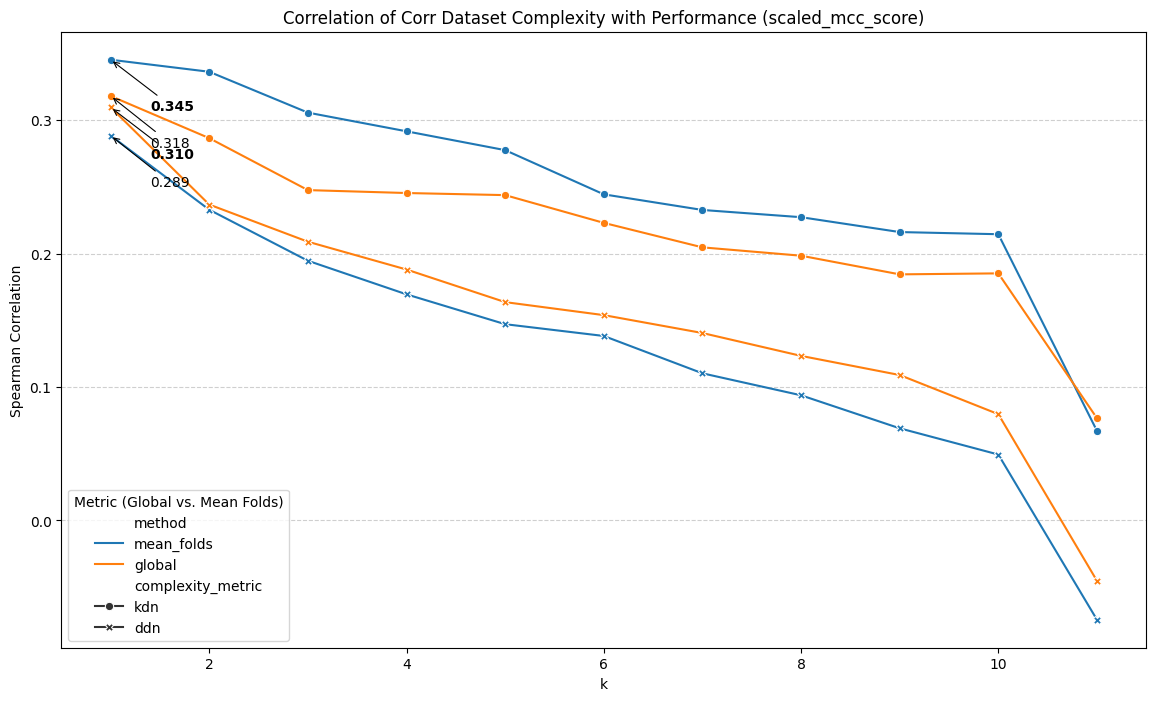

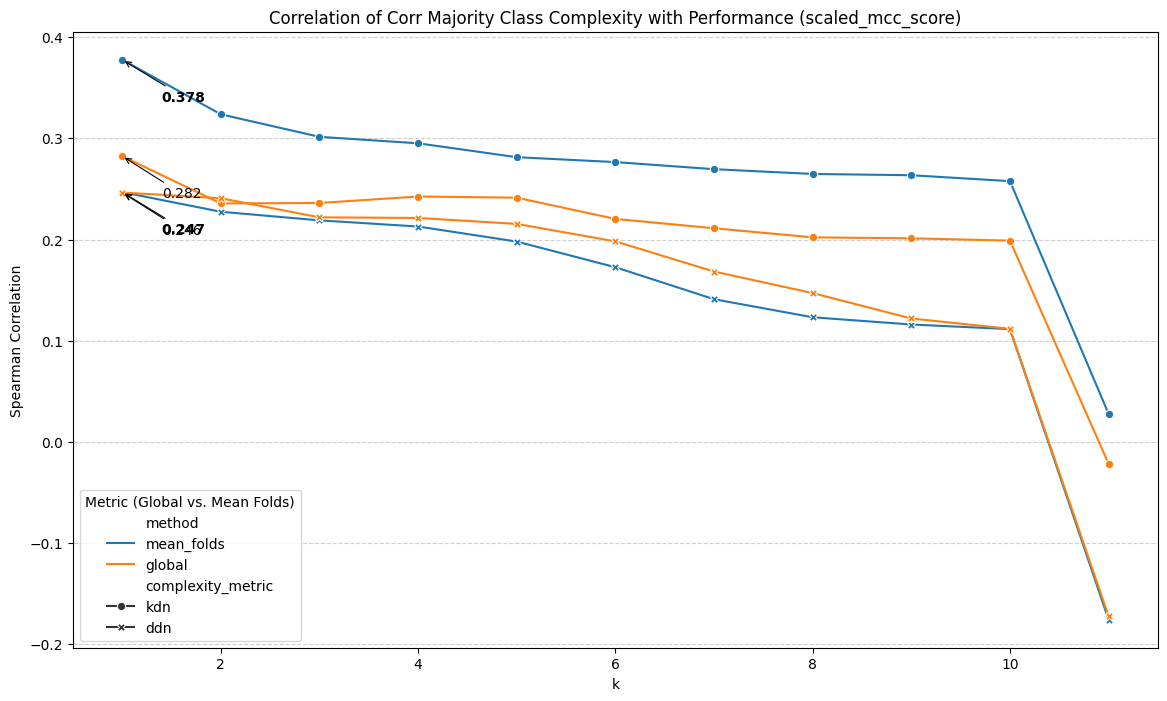

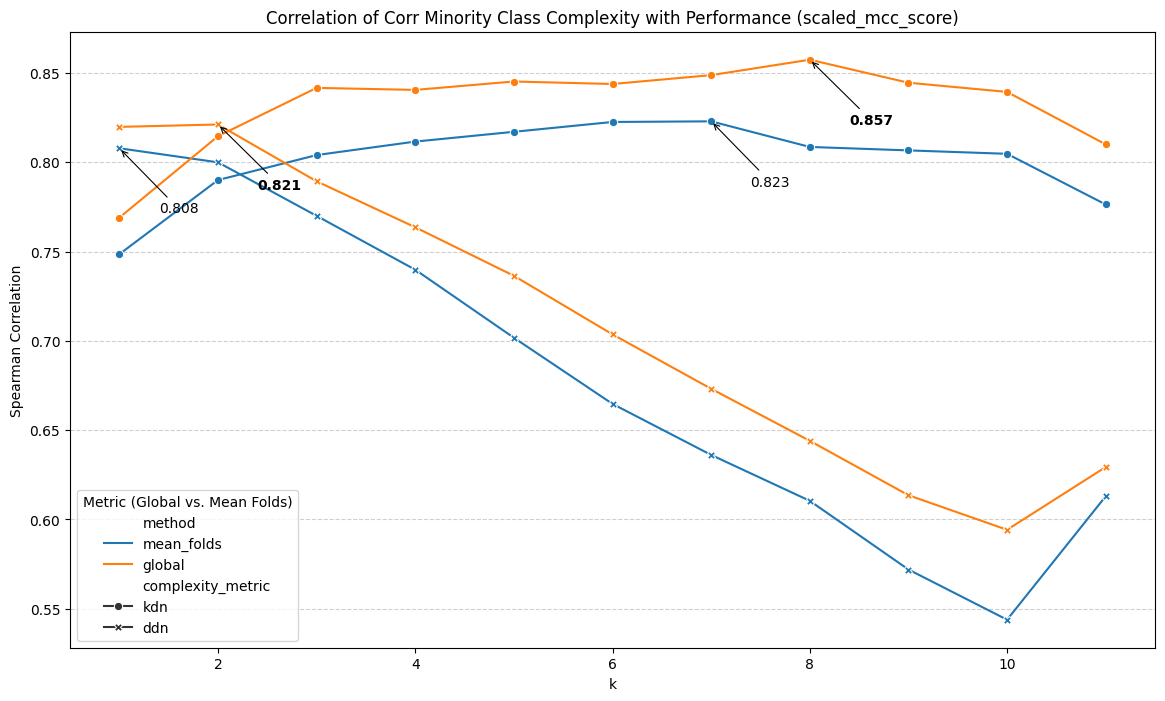

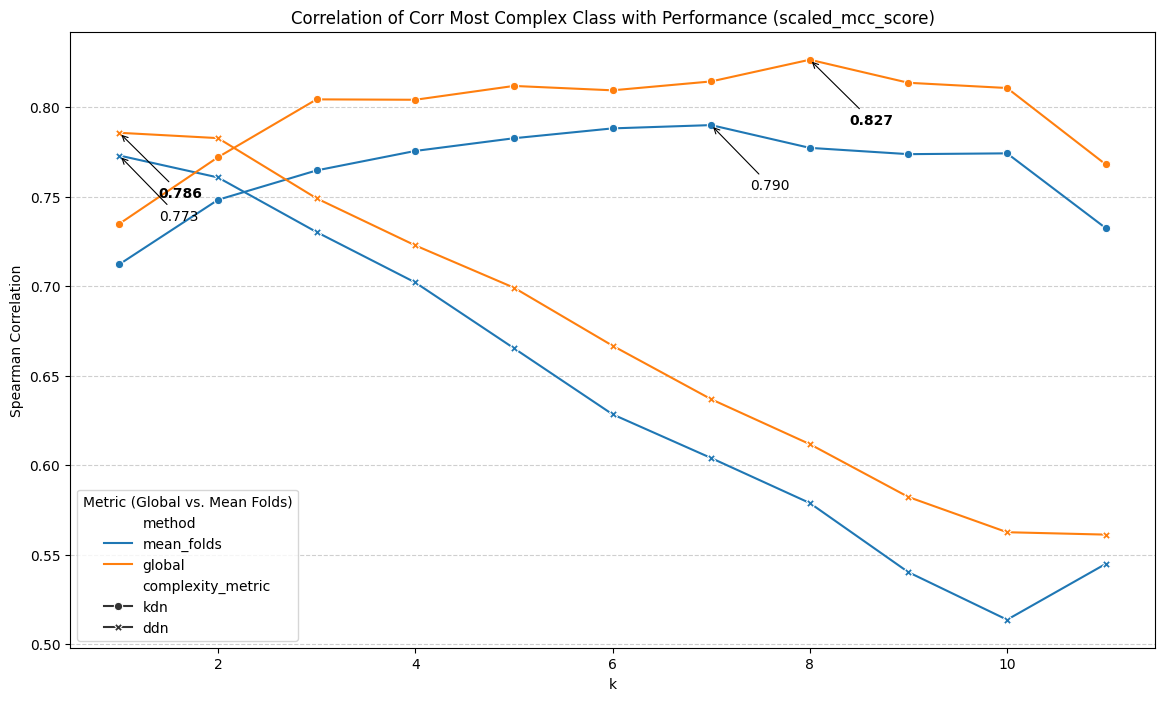

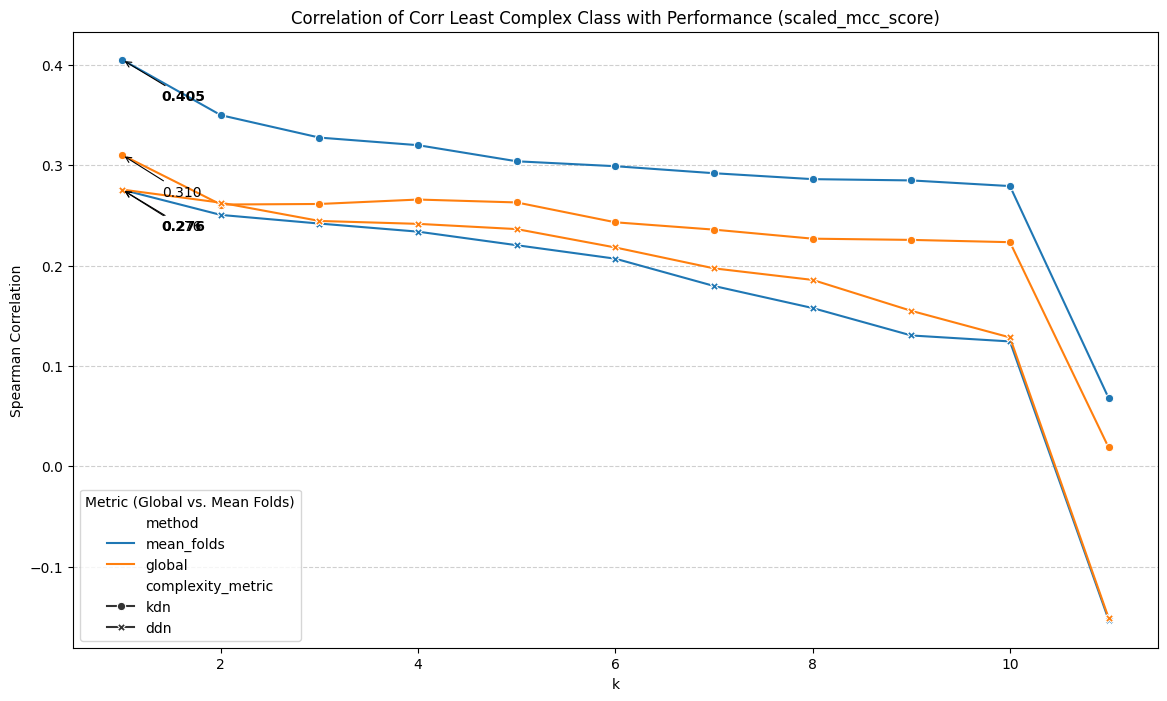

In [11]:
plot_line_correlations(df)

### GPS

In [12]:
correlation_results['gps_score']

,method,k,complexity_metric,performance_metric,corr_dataset_complexity,corr_majority_class_complexity,corr_minority_class_complexity,corr_most_complex_class,corr_least_complex_class
0,mean_folds,1,kdn,gps_score,0.421163,0.461155,0.743525,0.708028,0.489941
1,mean_folds,1,ddn,gps_score,0.360148,0.329159,0.800044,0.765852,0.359549
2,mean_folds,2,kdn,gps_score,0.412439,0.408418,0.785830,0.744436,0.436558
3,mean_folds,2,ddn,gps_score,0.306512,0.311233,0.790428,0.751267,0.336538
4,mean_folds,3,kdn,gps_score,0.381276,0.384073,0.798252,0.759266,0.412649
5,mean_folds,3,ddn,gps_score,0.270455,0.304371,0.755507,0.715778,0.329240
6,mean_folds,4,kdn,gps_score,0.367876,0.378697,0.803615,0.767556,0.405787
7,mean_folds,4,ddn,gps_score,0.246853,0.300524,0.723208,0.685795,0.323252
8,mean_folds,5,kdn,gps_score,0.354502,0.366740,0.807124,0.772771,0.391482
9,mean_folds,5,ddn,gps_score,0.224257,0.287325,0.680332,0.644406,0.310883


In [13]:
df = correlation_results['gps_score']
# Generar el resumen de las correlaciones
correlation_summary = summarize_correlations(df)  # Usando 'scaled_mcc_score' como ejemplo

# Mostrar los resultados
correlation_summary

,method,complexity_metric,mean_corr_dataset,std_corr_dataset,mean_corr_majority,std_corr_majority,mean_corr_minority,std_corr_minority,mean_corr_most_complex,std_corr_most_complex,mean_corr_least_complex,std_corr_least_complex
0,global,ddn,0.227460,0.092528,0.243983,0.122496,0.687733,0.091339,0.650443,0.090618,0.270330,0.123253
1,global,kdn,0.294706,0.065337,0.288082,0.084041,0.819811,0.024992,0.784768,0.027041,0.316179,0.079187
2,mean_folds,ddn,0.204359,0.099598,0.232054,0.122267,0.656246,0.101480,0.619787,0.099684,0.258560,0.123466
3,mean_folds,kdn,0.327908,0.079789,0.351411,0.092512,0.790044,0.021839,0.754288,0.023894,0.378690,0.088088


### MCC

In [14]:
correlation_results['scaled_mcc_score']

,method,k,complexity_metric,performance_metric,corr_dataset_complexity,corr_majority_class_complexity,corr_minority_class_complexity,corr_most_complex_class,corr_least_complex_class
0,mean_folds,1,kdn,scaled_mcc_score,0.496197,0.533527,0.753355,0.718574,0.564421
1,mean_folds,1,ddn,scaled_mcc_score,0.436399,0.406413,0.807344,0.773913,0.438956
2,mean_folds,2,kdn,scaled_mcc_score,0.486947,0.484783,0.792298,0.751314,0.515026
3,mean_folds,2,ddn,scaled_mcc_score,0.386974,0.389772,0.794230,0.755284,0.417178
4,mean_folds,3,kdn,scaled_mcc_score,0.457551,0.462162,0.798426,0.759698,0.492995
5,mean_folds,3,ddn,scaled_mcc_score,0.353710,0.384504,0.756376,0.716730,0.411234
6,mean_folds,4,kdn,scaled_mcc_score,0.445984,0.457878,0.802129,0.765804,0.487094
7,mean_folds,4,ddn,scaled_mcc_score,0.332073,0.381838,0.722107,0.685346,0.406360
8,mean_folds,5,kdn,scaled_mcc_score,0.433439,0.447077,0.802054,0.767435,0.473921
9,mean_folds,5,ddn,scaled_mcc_score,0.310961,0.369555,0.677019,0.642116,0.394383


In [15]:
df = correlation_results['scaled_mcc_score']
# Generar el resumen de las correlaciones
correlation_summary = summarize_correlations(df)  # Usando 'scaled_mcc_score' como ejemplo

# Mostrar los resultados
correlation_summary

,method,complexity_metric,mean_corr_dataset,std_corr_dataset,mean_corr_majority,std_corr_majority,mean_corr_minority,std_corr_minority,mean_corr_most_complex,std_corr_most_complex,mean_corr_least_complex,std_corr_least_complex
0,global,ddn,0.316495,0.079857,0.330450,0.107516,0.687819,0.094398,0.652464,0.091442,0.358151,0.107826
1,global,kdn,0.379746,0.052816,0.371223,0.072220,0.812641,0.021619,0.777547,0.023374,0.401603,0.066724
2,mean_folds,ddn,0.294334,0.087167,0.318977,0.108072,0.657076,0.105097,0.622475,0.101230,0.346696,0.108856
3,mean_folds,kdn,0.411880,0.066482,0.433857,0.081394,0.785653,0.019310,0.749734,0.020601,0.463408,0.076390


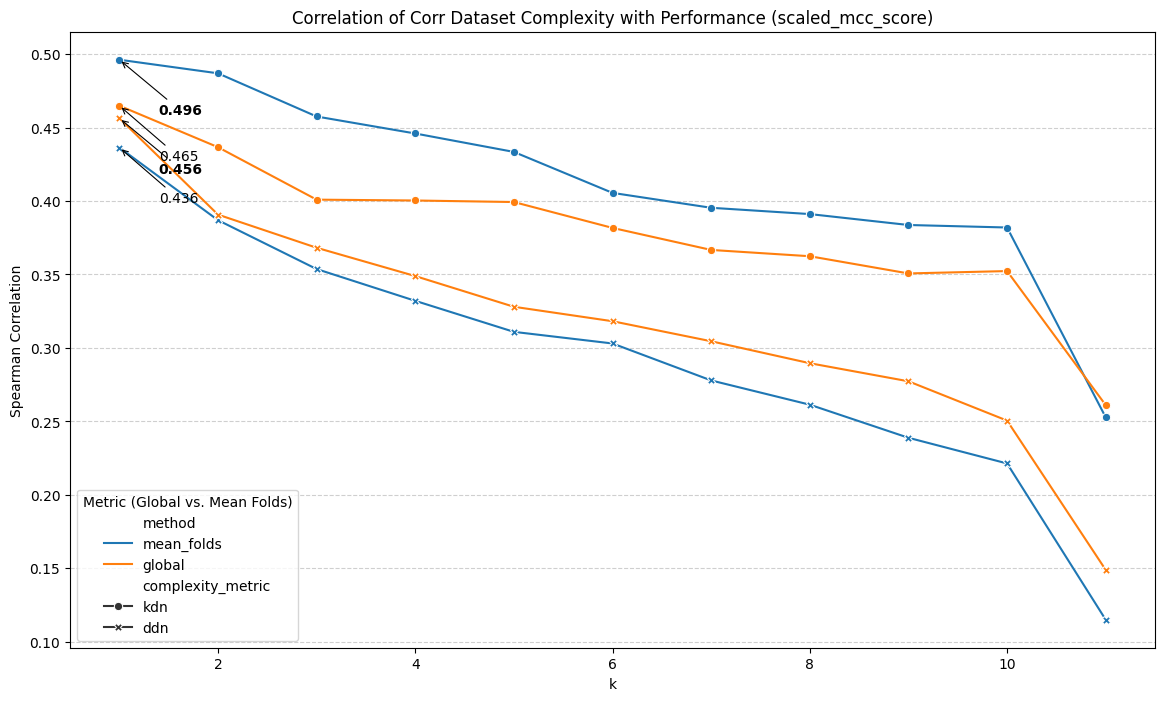

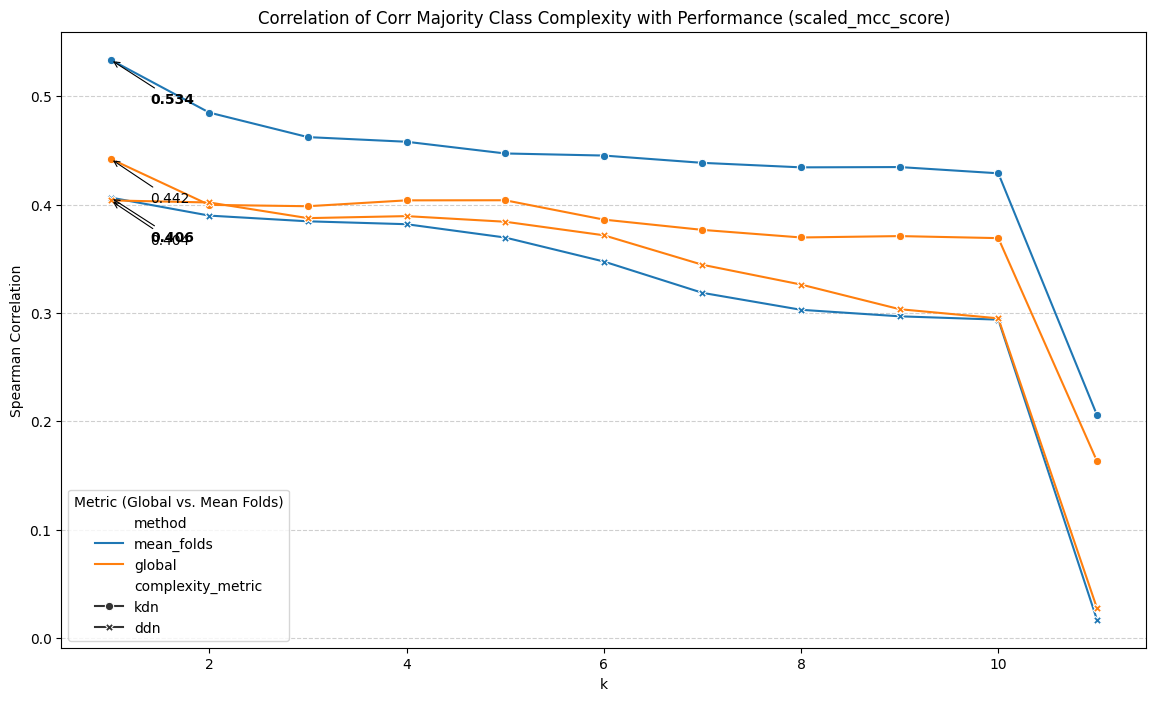

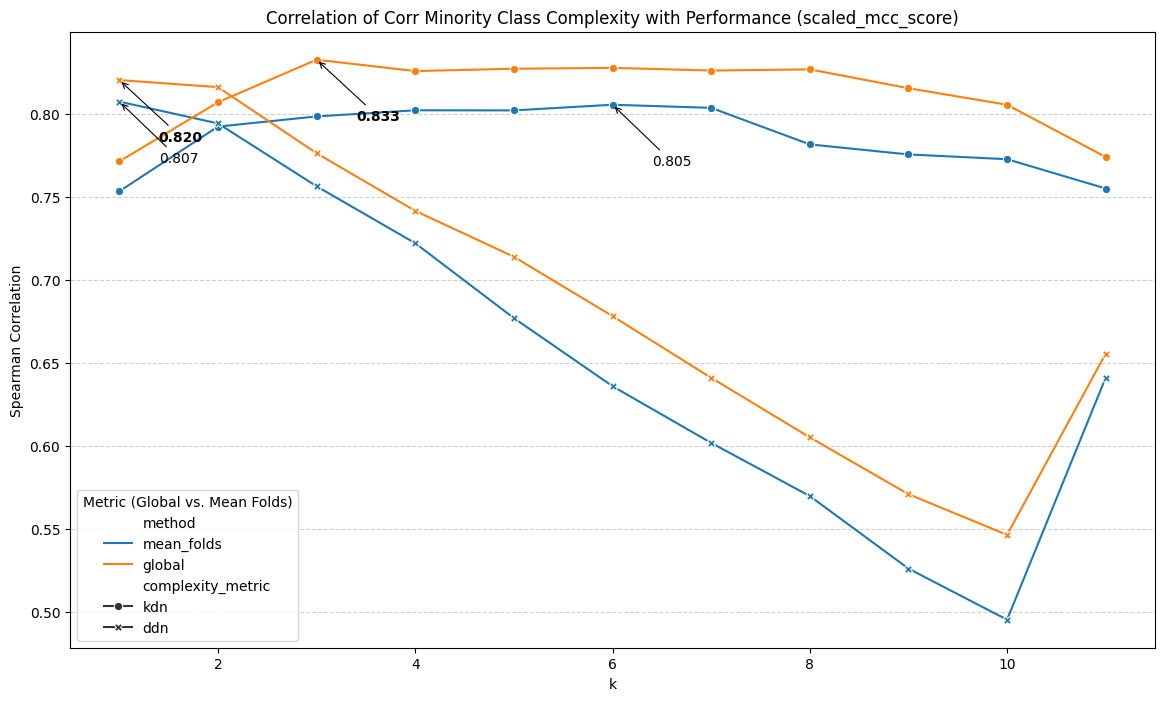

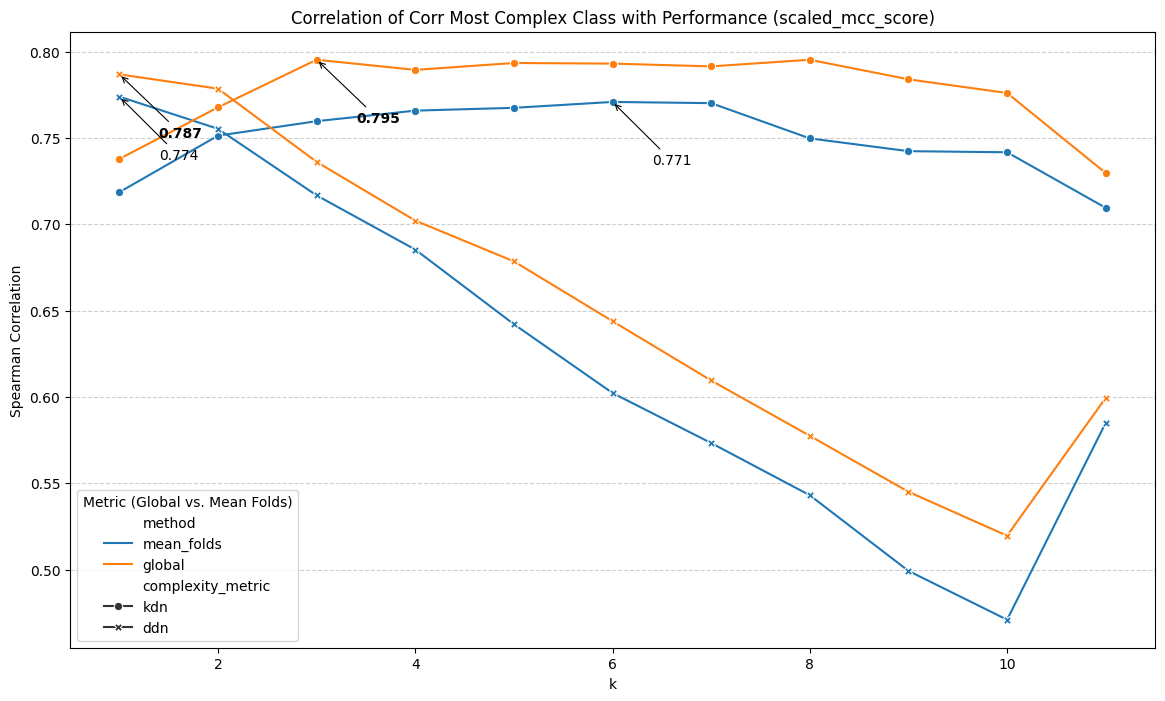

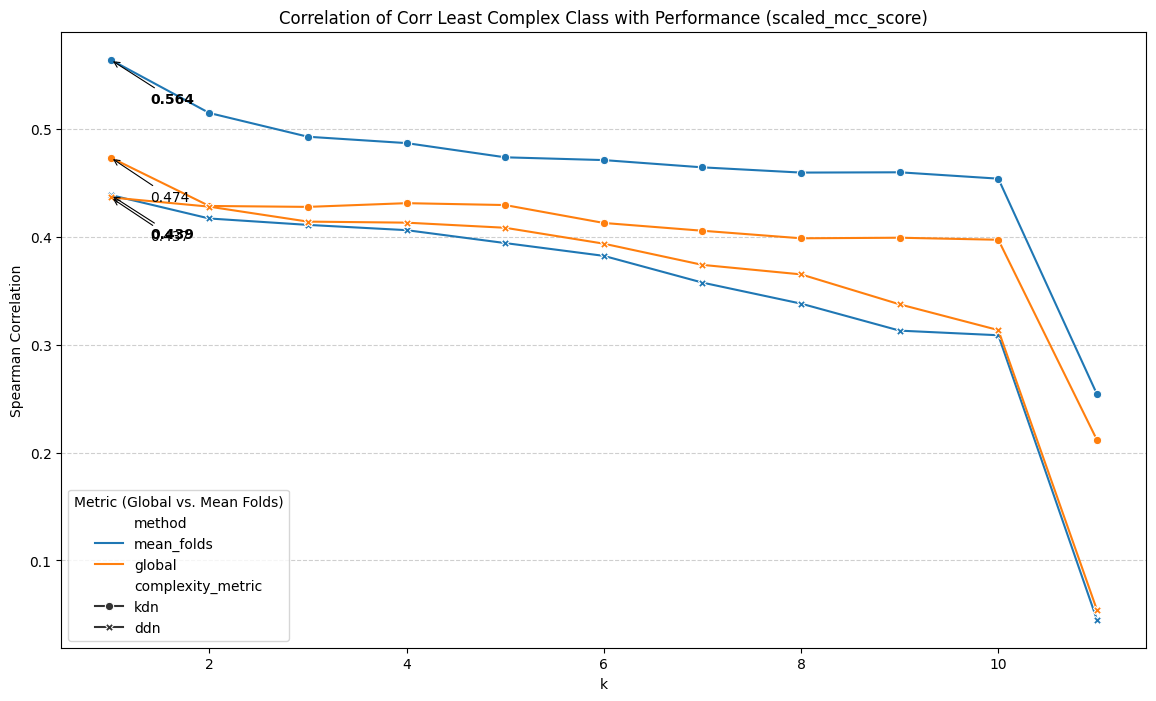

In [16]:
plot_line_correlations(df)

## Analysis of Performance Differences Relative to Complexity Measures Across k Values

In [48]:
df_score_differences = pd.read_parquet('data/results/score_differences_data.parquet')


In [76]:
df_score_differences

,dataset,metric_x,score,score_sd,k,metric_y,minority_class_complexity,most_complex_class,diff_score_minority_class_complexity,diff_score_most_complex_class
0,a9a,accuracy_score,0.850035,0.003225,1,kdn,0.375717,0.375717,0.225753,0.225753
1,a9a,accuracy_score,0.850035,0.003225,1,ddn,0.423633,0.423633,0.273669,0.273669
2,a9a,accuracy_score,0.850035,0.003225,2,kdn,0.394082,0.394082,0.244118,0.244118
3,a9a,accuracy_score,0.850035,0.003225,2,ddn,0.427657,0.427657,0.277693,0.277693
4,a9a,accuracy_score,0.850035,0.003225,3,kdn,0.405816,0.405816,0.255851,0.255851
...,...,...,...,...,...,...,...,...,...,...
5491,vehicle2,scaled_mcc_score,0.987671,0.007849,8,ddn,0.269450,0.269450,0.257120,0.257120
5492,vehicle2,scaled_mcc_score,0.987671,0.007849,9,kdn,0.113660,0.113660,0.101330,0.101330
5493,vehicle2,scaled_mcc_score,0.987671,0.007849,9,ddn,0.290963,0.290963,0.278634,0.278634
5494,vehicle2,scaled_mcc_score,0.987671,0.007849,10,kdn,0.120642,0.120642,0.108313,0.108313


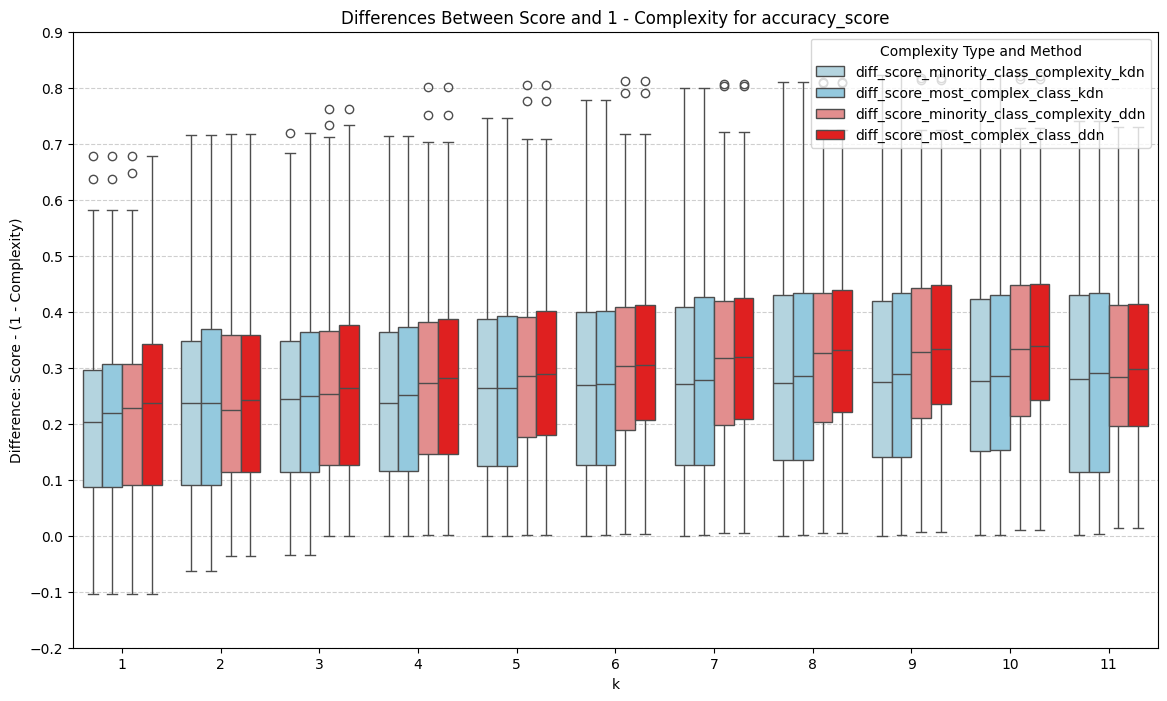

In [50]:
plot_score_differences(df_score_differences, 'accuracy_score')

In [60]:
statistical_results, explanation_text = calculate_statistical_differences(df_score_differences, 'accuracy_score')
display(statistical_results)
print(explanation_text)

,method,performance_metric,k,test_used,test_statistic,p_value,normality_p_value,normality_test
0,kdn,accuracy_score,1,Wilcoxon signed-rank test,0.0,0.179712,6.153847e-18,Shapiro-Wilk
1,ddn,accuracy_score,1,Wilcoxon signed-rank test,0.0,0.179712,6.155228e-18,Shapiro-Wilk



For method kdn using Wilcoxon signed-rank test: There is no statistically significant difference between the two measures. Test statistic: 0.000, p-value: 0.180.
For method ddn using Wilcoxon signed-rank test: There is no statistically significant difference between the two measures. Test statistic: 0.000, p-value: 0.180.


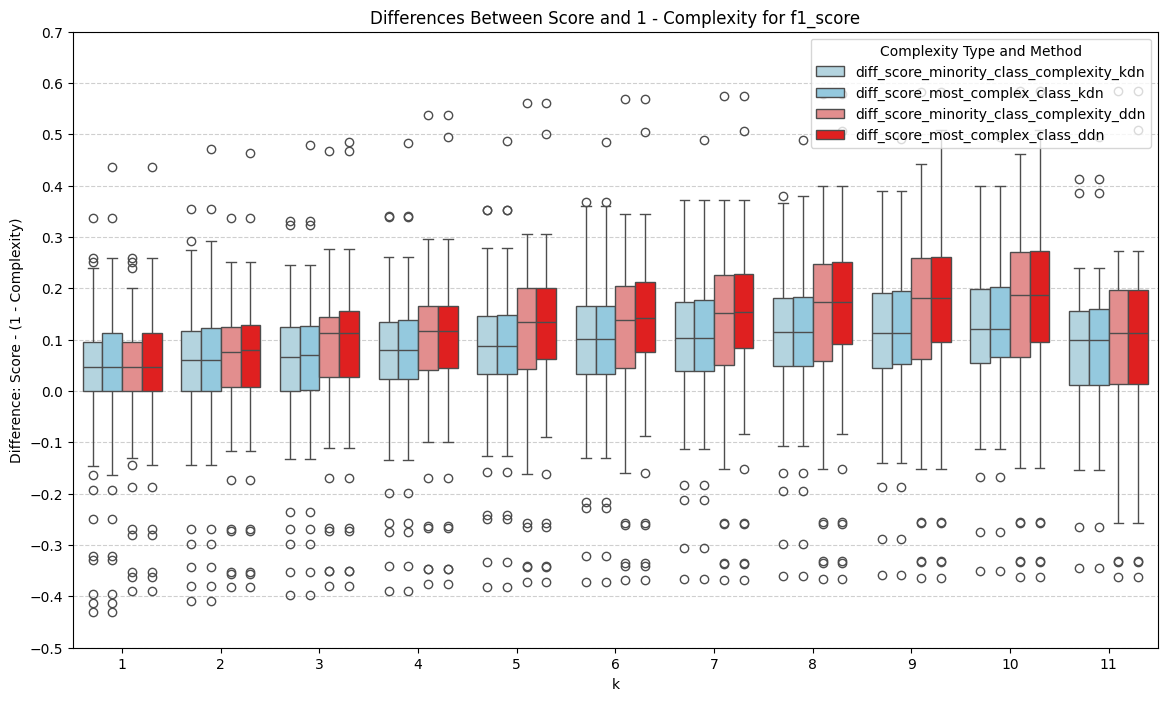

In [51]:
plot_score_differences(df_score_differences, 'f1_score')

In [61]:
statistical_results, explanation_text = calculate_statistical_differences(df_score_differences, 'f1_score')
display(statistical_results)
print(explanation_text)

,method,performance_metric,k,test_used,test_statistic,p_value,normality_p_value,normality_test
0,kdn,f1_score,1,Wilcoxon signed-rank test,0.0,0.179712,6.153847e-18,Shapiro-Wilk
1,ddn,f1_score,1,Wilcoxon signed-rank test,0.0,0.179712,6.155228e-18,Shapiro-Wilk



For method kdn using Wilcoxon signed-rank test: There is no statistically significant difference between the two measures. Test statistic: 0.000, p-value: 0.180.
For method ddn using Wilcoxon signed-rank test: There is no statistically significant difference between the two measures. Test statistic: 0.000, p-value: 0.180.


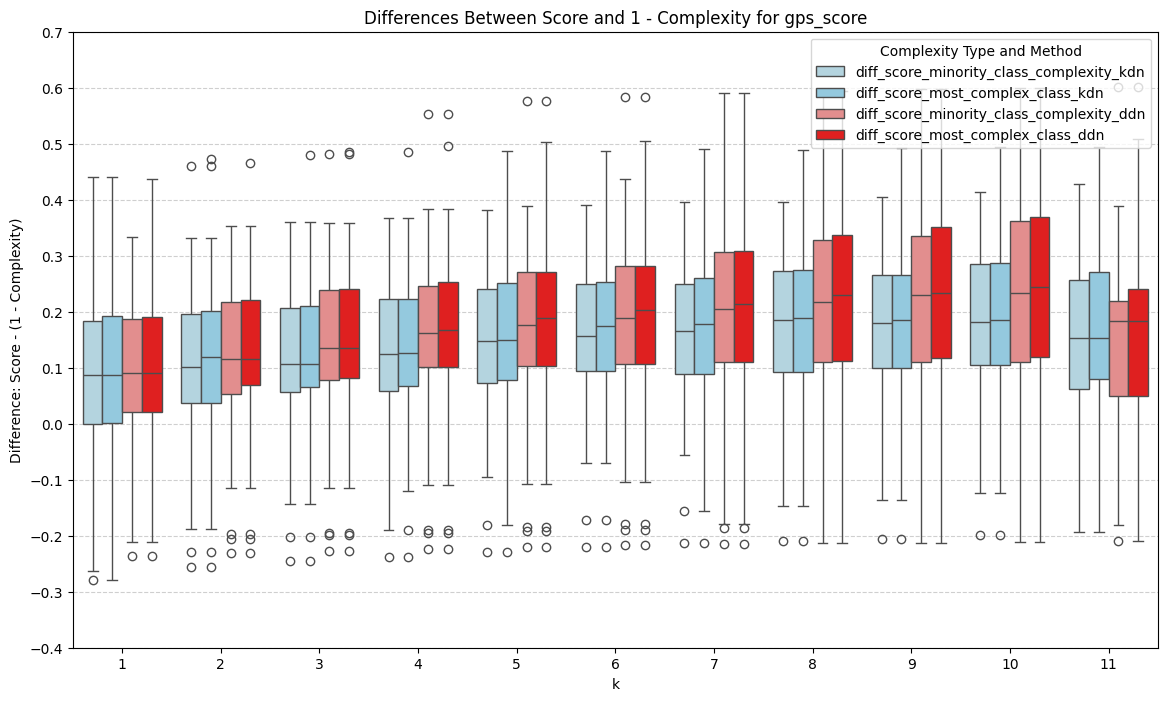

In [52]:
plot_score_differences(df_score_differences, 'gps_score')

In [62]:
statistical_results, explanation_text = calculate_statistical_differences(df_score_differences, 'gps_score')
display(statistical_results)
print(explanation_text)

,method,performance_metric,k,test_used,test_statistic,p_value,normality_p_value,normality_test
0,kdn,gps_score,1,Wilcoxon signed-rank test,0.0,0.179712,6.153847e-18,Shapiro-Wilk
1,ddn,gps_score,1,Wilcoxon signed-rank test,0.0,0.179712,6.155228e-18,Shapiro-Wilk



For method kdn using Wilcoxon signed-rank test: There is no statistically significant difference between the two measures. Test statistic: 0.000, p-value: 0.180.
For method ddn using Wilcoxon signed-rank test: There is no statistically significant difference between the two measures. Test statistic: 0.000, p-value: 0.180.


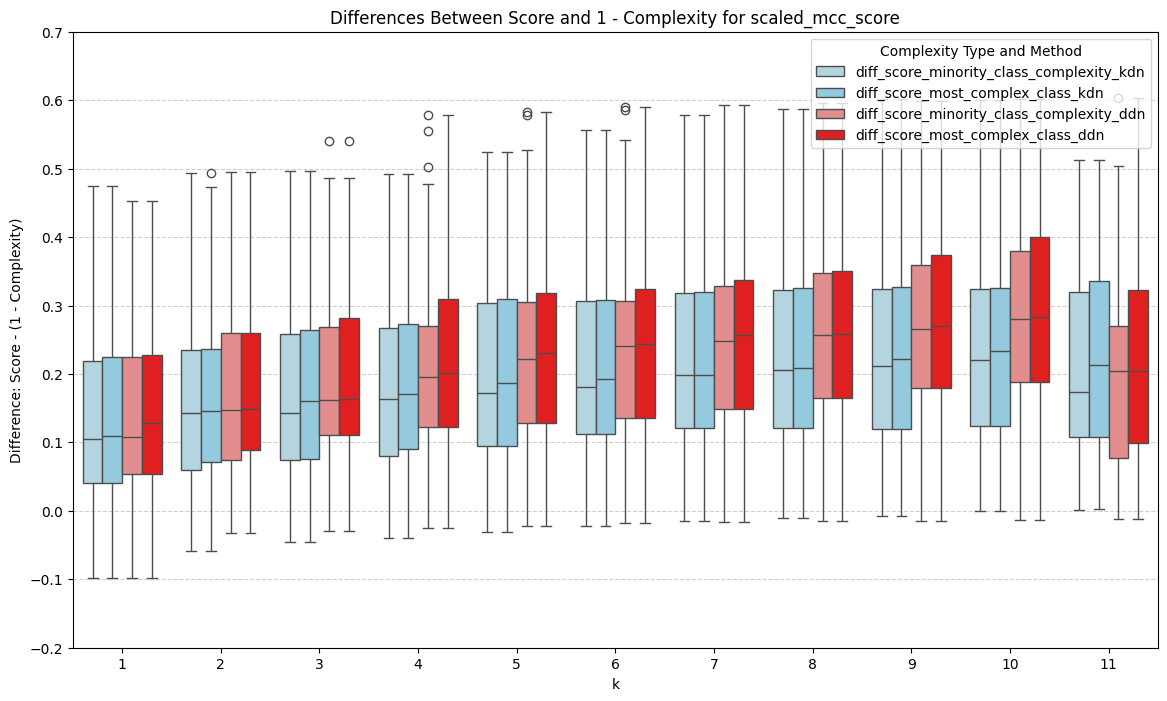

In [53]:
plot_score_differences(df_score_differences, 'scaled_mcc_score')

In [63]:
statistical_results, explanation_text = calculate_statistical_differences(df_score_differences, 'scaled_mcc_score')
display(statistical_results)
print(explanation_text)

,method,performance_metric,k,test_used,test_statistic,p_value,normality_p_value,normality_test
0,kdn,scaled_mcc_score,1,Wilcoxon signed-rank test,0.0,0.179712,6.153847e-18,Shapiro-Wilk
1,ddn,scaled_mcc_score,1,Wilcoxon signed-rank test,0.0,0.179712,6.155228e-18,Shapiro-Wilk



For method kdn using Wilcoxon signed-rank test: There is no statistically significant difference between the two measures. Test statistic: 0.000, p-value: 0.180.
For method ddn using Wilcoxon signed-rank test: There is no statistically significant difference between the two measures. Test statistic: 0.000, p-value: 0.180.
